In [1]:
import numpy as np
import rescomp

import matplotlib.pyplot as plt

### Lorenz system:

In [2]:
# Lorenz system
def data_creation_function_Lorenz(time_steps, dt, starting_point=None):
    return  rescomp.simulate_trajectory(
            sys_flag='lorenz', dt=dt, time_steps=time_steps,
            starting_point=starting_point)

In [11]:
dt = 0.05
N = 1000
tau = 100
T = 1
eps = 1e-6

In [12]:
starting_point = np.array([-14.03020521, -20.88693127, 25.53545])

f = lambda x: data_creation_function_Lorenz(time_steps=2, dt=dt, starting_point=x)[-1]


lyapunov_exp, lyapunov_exp_convergence = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point, T=T, 
                                                                                           tau=tau,
                                                  eps=eps, nr_steps=N, dt=dt, return_convergence=True)

[ 8.52714912e-01  1.00140020e-04 -1.35103408e+01]
2.0631231338667466


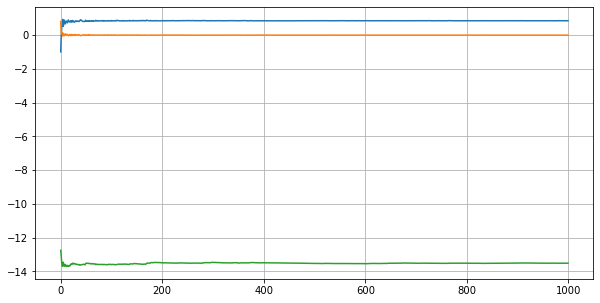

In [13]:
print(lyapunov_exp)
plt.figure(figsize=(10,5))
for iteration in lyapunov_exp_convergence.T:
    plt.plot(iteration)
plt.grid()

print(rescomp.measures.KY_dimension(lyapunov_exp))

### KS System:

In [ ]:
# KS system:
dimensions = 64
system_size = 36
def data_creation_function_KS(time_steps, dt, starting_point=None):
    sim_data = rescomp.simulate_trajectory(
            sys_flag='kuramoto_sivashinsky', dimensions=dimensions, system_size=system_size, dt=dt,
            time_steps=time_steps, starting_point = starting_point)
    return sim_data

In [ ]:
dt = 0.1
N = 100
tau = 10
T = 2
eps = 1e-6
m = 12

In [ ]:
starting_point = None
f = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]


lyapunov_exp, lyapunov_exp_convergence = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point, T=T, 
                                                                                           tau=tau,
                                                  eps=eps, nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)

In [ ]:
print(lyapunov_exp)
plt.figure(figsize=(10,5))
for iteration in lyapunov_exp_convergence.T:
    plt.plot(iteration[20:])
plt.grid()

In [ ]:
for i, x in enumerate(lyapunov_exp):
    print(i+1, x.round(3))

In [ ]:
lyapunov_exponents = lyapunov_exp

lyapunov_sorted = np.sort(lyapunov_exponents)[::-1] # ascending order 
cumsum = lyapunov_sorted.cumsum()
j = np.where((cumsum>=0))[0].max() + 1 # +1 since index starts from 0

D_KY = j + cumsum[j-1]/np.abs(lyapunov_sorted[j])
print(D_KY)